# To Do

1. Make sure to import all modules needed.
2. Check dtypes of all variables in the data frame (Use code df.info()).
2. How is your dataset stored as? Data Frame?
3. If you have all data stored as 'object'. Convert them into a form that is memory efficient. For example, categorical variables have be converted into such type & numerical into int or float.
4. Take care of tips from Alex.

# Capstone Projects Ideas

## 1. Predict Energy Requirement based on Building Attributes

Predict the heating and cooling load for a building based on its attributes such as glazing area, compactness, surface area, wall height etc. The data was generated using simulation software 'Ecotect'. This software is owned by Autodesk.

[Link](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

## 2. Predict Breast Cancer diagnosis using biopsy data

Predict the diagnosis (i.e. malignant or benign) of biopsy using the cell attributes from biopsy. The attributes are discrete and have only certain values.

[Link](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

## 3. Predict Epileptic Seizures

Predict epileptic seizure from time series EEG data. 

Time series data containing EEG readings. The EEG data are sampled at 178 datapoints per sec. At the end of each second, the patient's state is recorded in numbers from 1 to 5. Number 1 meaning the patient is having a seizure.

[Link](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)


# Select Project number 2 - Predict Breast Cancer diagnosis using biopsy data.


# Tips from Alex

1. Check if the predictors are correlated.

2. It is helpful to transform the variable. For example, extremely skewed variable could be applied logarithm. Some times, the data can be scaled (x - Mu)/sigma. THis may not be used

3. Class imbalance: How many cases are cancerous vs benign? Subsample benign class such that you have 50/50.

4. 10 fold cross validation.

5. Regression is sometimes preferred since the model parameters have meaning.


1. Make a confusion matrix. Keeps track of false positives & negatives.

2. How to get confidence in predictions? It is likely that scikit learn may not have this built in.

3. When you have 10 fold cross validation, you have 10 models. Which model do you end up using?

The 10 fold cross validation is just to get the accuracy of the model. At the end, the final model is built using 100%.

# Code to Build Random Forest Classifier

/Users/Murali/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


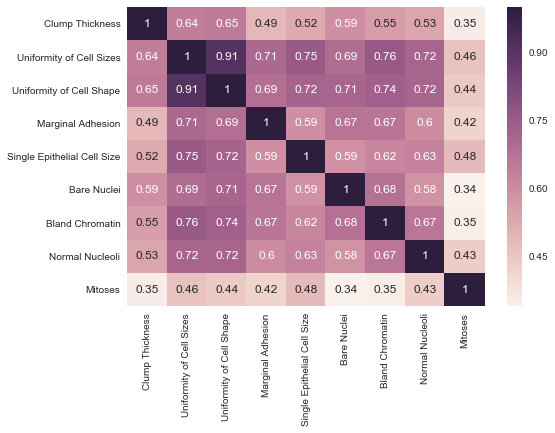

[ 0.94202899  0.94202899  0.95652174  0.92753623  0.98529412  0.95588235
  0.95588235  0.98529412  0.98529412  1.        ]
Confusion Matrix
                     Actual Benign  Actual Malignant
Predicted Benign                44                 0
Predicted Malignant              3                22
Identifying Important Features


/Users/Murali/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


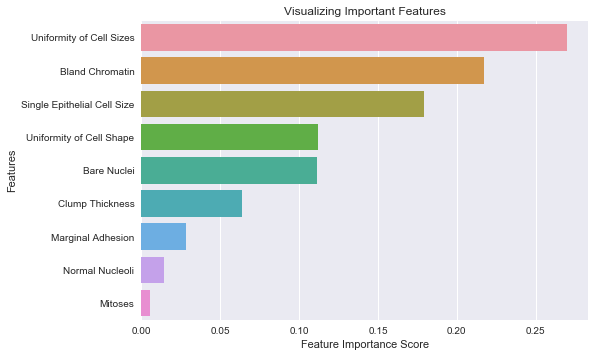

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Read Data & Remove rows with NA's
df_with_na = pd.read_excel('Breast Cancer Data in Excel.xlsx', sheetname='Sheet1', header=0)
rows_with_na = []

# Dropna function did not work on this dataframe. So the code below was used.
for i in range(df_with_na.shape[0]):
    if(sum(np.isnan(df_with_na.iloc[i,:]))>0):
        rows_with_na.append(i)

df = df_with_na.drop(rows_with_na)
        
# Look at the correlation in the predictor variables
corr = df.iloc[:,1:10].corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()
print('=========================')
#========================================================================================

# Build Random Forest Classifier Model using 10 fold cross validation.
X = df.iloc[:,1:10]
y = df.iloc[:,10]

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
                             min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=10)
print(scores)
#========================================================================================

# Build Random Forest Classifier using 90% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1) # 10% Test Data
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
cols = ['Actual Benign', 'Actual Malignant']
inds = ['Predicted Benign', 'Predicted Malignant']
confusion_matrix_results_df = pd.DataFrame(confusion_matrix_results, index=inds, columns=cols)
print('Confusion Matrix')
print(confusion_matrix_results_df)
print('=========================')
#========================================================================================

# Identify important features
print('Identifying Important Features')
feature_imp = pd.Series(clf.feature_importances_, index = df.columns[1:10]).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
#========================================================================================
